In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel('./Data.xlsx', sheet_name = None)

In [4]:
df.keys()

dict_keys(['ANDHRA PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'TAMIL NADU', 'TELANGANA', 'UTTAR PRADESH', 'WEST BENGAL'])

In [7]:
def preprocess(state_df, state):
    columns = state_df.columns
    
    columns_to_remove = []
    for column in columns:
        if 'lacs' in column:
            column_renamed = column.replace('lacs', 'crores')
            state_df[column_renamed] = (state_df[column] / 100 )
            columns_to_remove.append(column)
        elif 'millions' in column:
            column_renamed = column.replace('millions', 'crores')
            state_df[column_renamed] = (state_df[column] / 10 )
            columns_to_remove.append(column)
        else:
            pass

    state_df = state_df.drop(columns = columns_to_remove)
    transposed_state_df = state_df.T
    transposed_state_df = transposed_state_df.reset_index()
    
    transposed_state_df.columns = transposed_state_df.iloc[0]
    transposed_state_df = transposed_state_df[1:].reset_index(drop=True)
    transposed_state_df['state'] = state
    return transposed_state_df

In [8]:
state_dfs = [preprocess(df[state], state) for state in df.keys()]
len(state_dfs)

19

In [9]:
state_dfs[0].head()

,Year,total revenue,Own Tax Revenue,Total expenditure,Developmental Expenditure,"Education, Sports, Arts and Culture",Medical and Public Health,Family Welfare,Non Developmental Expenditure,Interest payments,Salaries,Pensions,state
0,2021-22 RE (in crores),154273,73631.8,173818,125590,22675.4,9240.67,3732.19,48200.4,21996.7,11349.5,12931.8,ANDHRA PRADESH
1,2020-21 RE (in crores),118063,57358.8,152990,104450,20678.3,5562.7,3417.94,48520.6,22026.3,9456.86,14506.9,ANDHRA PRADESH
2,2019-20 RE (in crores),110871,57428.9,137518,93542.2,19961.2,5263.23,2074.56,43960,16392.9,7890.64,17381.5,ANDHRA PRADESH
3,2018-19 RE (in crores),114684,58694.8,126339,86528.3,19341.8,5219.69,2005.49,39769.6,14303.5,7598.97,15290.6,ANDHRA PRADESH
4,2017-18 RE (in crores),123254,52715.7,127272,87996.1,20219.5,4643.57,1885.75,39209.3,14756.2,7266.93,14384.8,ANDHRA PRADESH


In [11]:
state_dfs[18].head()

,Year,total revenue,Own Tax Revenue,Total expenditure,Developmental Expenditure,"Education, Sports, Arts and Culture",Medical and Public Health,Family Welfare,Non Developmental Expenditure,Interest payments,Salaries,Pensions,state
0,2021-22 RE (in crores),176031,73904.6,208995,133305,38093.6,13831,1253.79,75176.1,36561.7,12696.2,22538.4,WEST BENGAL
1,2020-21 RE (in crores),145971,59886.6,180316,112370,36436,10901.1,896.288,67435.6,33593.3,11124.8,19623.2,WEST BENGAL
2,2019-20 RE (in crores),163259,65806,169430,104582,32267.6,8470.11,974.006,64336,31305.8,10972.2,18324.6,WEST BENGAL
3,2018-19 RE (in crores),152625,61616.9,160150,102794,28939.6,7474.24,745.383,56847.1,29140,8817.56,15297.4,WEST BENGAL
4,2017-18 RE (in crores),133034,45478.5,144040,90816.9,25518.3,6973.45,687.32,52724.3,27595.9,7843.24,14673.6,WEST BENGAL


In [12]:
final_df = pd.concat(state_dfs)
final_df.head()

,Year,total revenue,Own Tax Revenue,Total expenditure,Developmental Expenditure,"Education, Sports, Arts and Culture",Medical and Public Health,Family Welfare,Non Developmental Expenditure,Interest payments,Salaries,Pensions,state
0,2021-22 RE (in crores),154273,73631.8,173818,125590,22675.4,9240.67,3732.19,48200.4,21996.7,11349.5,12931.8,ANDHRA PRADESH
1,2020-21 RE (in crores),118063,57358.8,152990,104450,20678.3,5562.7,3417.94,48520.6,22026.3,9456.86,14506.9,ANDHRA PRADESH
2,2019-20 RE (in crores),110871,57428.9,137518,93542.2,19961.2,5263.23,2074.56,43960,16392.9,7890.64,17381.5,ANDHRA PRADESH
3,2018-19 RE (in crores),114684,58694.8,126339,86528.3,19341.8,5219.69,2005.49,39769.6,14303.5,7598.97,15290.6,ANDHRA PRADESH
4,2017-18 RE (in crores),123254,52715.7,127272,87996.1,20219.5,4643.57,1885.75,39209.3,14756.2,7266.93,14384.8,ANDHRA PRADESH


In [13]:
final_df.shape

(152, 13)

In [14]:
final_df['Year'].unique()

array(['2021-22 RE (in crores)', '2020-21 RE (in crores)',
       '2019-20 RE (in crores)', '2018-19 RE (in crores)',
       '2017-18 RE (in crores)', '2016-17 RE (in crores)',
       '2015-16 RE (in crores)', '2014-15 RE (in crores)'], dtype=object)

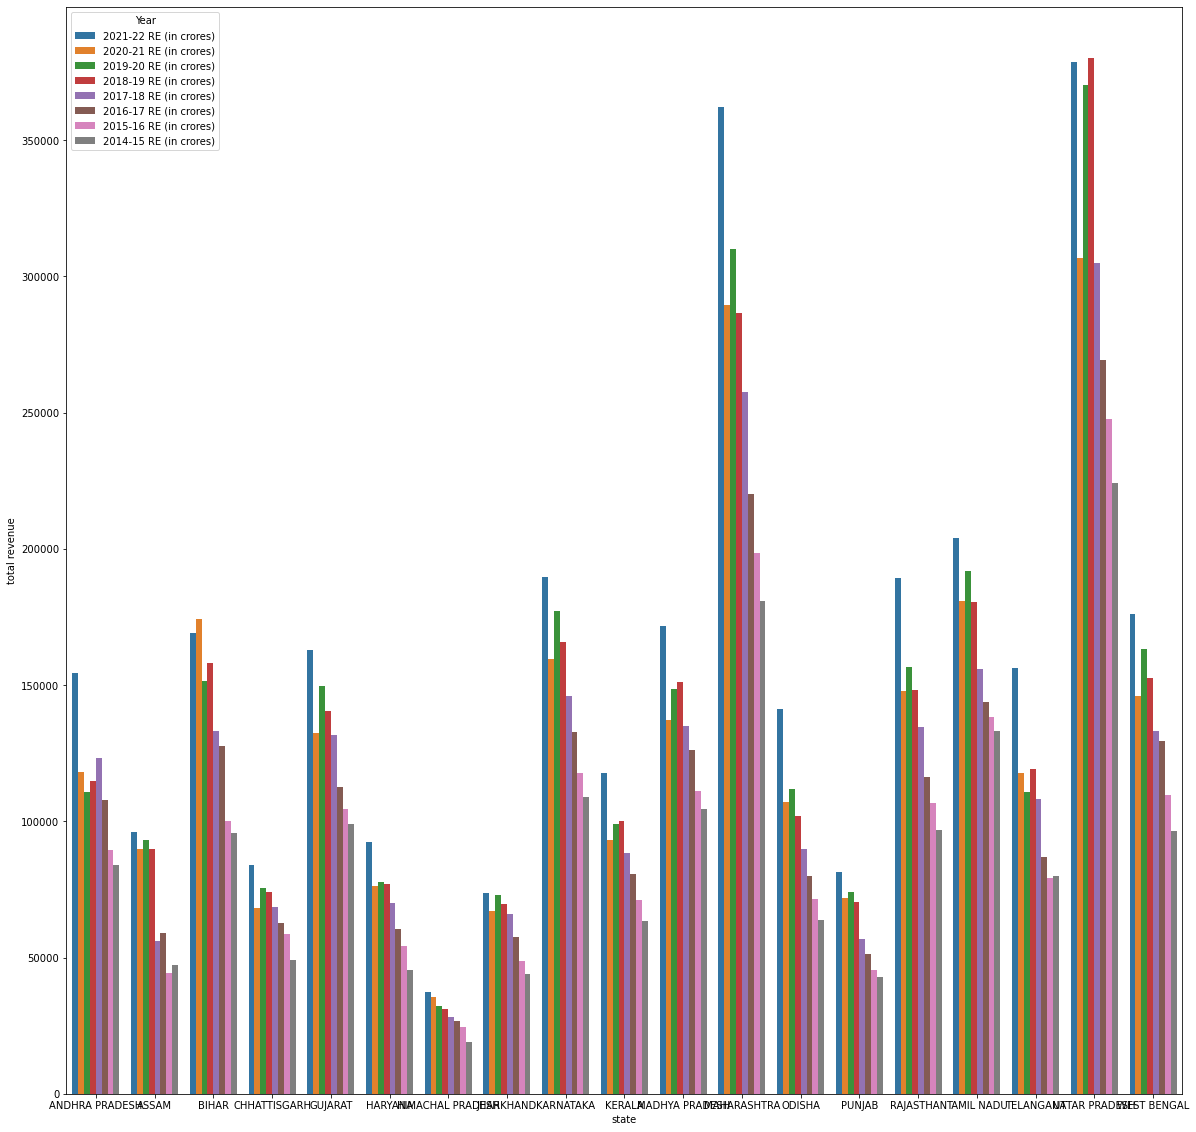

In [17]:
plt.figure(figsize = (20, 20))
sns.barplot(data = final_df, x = 'state', y = 'total revenue', hue = 'Year')
plt.show()

In [18]:
final_df.columns

Index(['Year', 'total revenue', 'Own Tax Revenue', 'Total expenditure',
       'Developmental Expenditure', 'Education, Sports, Arts and Culture',
       'Medical and Public Health', 'Family Welfare',
       'Non Developmental Expenditure', 'Interest payments', 'Salaries',
       'Pensions', 'state'],
      dtype='object', name=0)

In [19]:
final_df['Own Tax Revenue as a percentage of total revenue'] = ( final_df['Own Tax Revenue'] * 100 ) / final_df['total revenue']
final_df.head()

,Year,total revenue,Own Tax Revenue,Total expenditure,Developmental Expenditure,"Education, Sports, Arts and Culture",Medical and Public Health,Family Welfare,Non Developmental Expenditure,Interest payments,Salaries,Pensions,state,Own Tax Revenue as a percentage of total revenue
0,2021-22 RE (in crores),154273,73631.8,173818,125590,22675.4,9240.67,3732.19,48200.4,21996.7,11349.5,12931.8,ANDHRA PRADESH,47.7284
1,2020-21 RE (in crores),118063,57358.8,152990,104450,20678.3,5562.7,3417.94,48520.6,22026.3,9456.86,14506.9,ANDHRA PRADESH,48.5832
2,2019-20 RE (in crores),110871,57428.9,137518,93542.2,19961.2,5263.23,2074.56,43960,16392.9,7890.64,17381.5,ANDHRA PRADESH,51.7979
3,2018-19 RE (in crores),114684,58694.8,126339,86528.3,19341.8,5219.69,2005.49,39769.6,14303.5,7598.97,15290.6,ANDHRA PRADESH,51.1795
4,2017-18 RE (in crores),123254,52715.7,127272,87996.1,20219.5,4643.57,1885.75,39209.3,14756.2,7266.93,14384.8,ANDHRA PRADESH,42.77


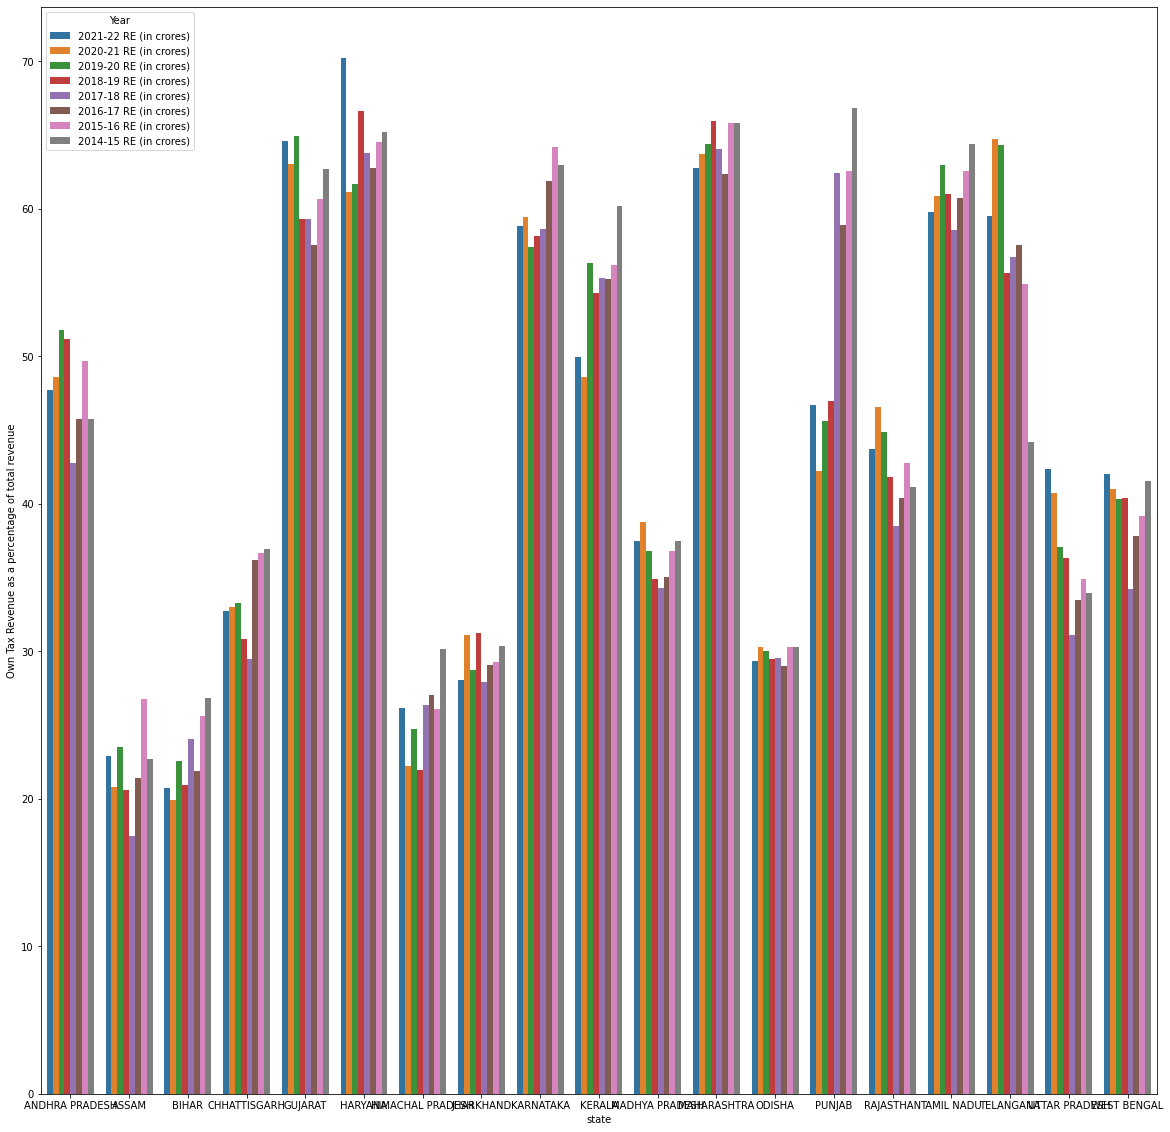

In [22]:
plt.figure(figsize = (20, 20))
sns.barplot(data = final_df, x = 'state', y = 'Own Tax Revenue as a percentage of total revenue', hue = 'Year')
plt.show()

In [23]:
final_df['Pensions as a percentage of total revenue'] = ( final_df['Pensions'] * 100 ) / final_df['total revenue']
final_df['Pensions as a percentage of Own Tax Revenue'] = ( final_df['Pensions'] * 100 ) / final_df['Own Tax Revenue']
final_df.head()

,Year,total revenue,Own Tax Revenue,Total expenditure,Developmental Expenditure,"Education, Sports, Arts and Culture",Medical and Public Health,Family Welfare,Non Developmental Expenditure,Interest payments,Salaries,Pensions,state,Own Tax Revenue as a percentage of total revenue,Pensions as a percentage of total revenue,Pensions as a percentage of Own Tax Revenue
0,2021-22 RE (in crores),154273,73631.8,173818,125590,22675.4,9240.67,3732.19,48200.4,21996.7,11349.5,12931.8,ANDHRA PRADESH,47.7284,8.38242,17.5628
1,2020-21 RE (in crores),118063,57358.8,152990,104450,20678.3,5562.7,3417.94,48520.6,22026.3,9456.86,14506.9,ANDHRA PRADESH,48.5832,12.2874,25.2915
2,2019-20 RE (in crores),110871,57428.9,137518,93542.2,19961.2,5263.23,2074.56,43960,16392.9,7890.64,17381.5,ANDHRA PRADESH,51.7979,15.6772,30.2661
3,2018-19 RE (in crores),114684,58694.8,126339,86528.3,19341.8,5219.69,2005.49,39769.6,14303.5,7598.97,15290.6,ANDHRA PRADESH,51.1795,13.3328,26.051
4,2017-18 RE (in crores),123254,52715.7,127272,87996.1,20219.5,4643.57,1885.75,39209.3,14756.2,7266.93,14384.8,ANDHRA PRADESH,42.77,11.6709,27.2876


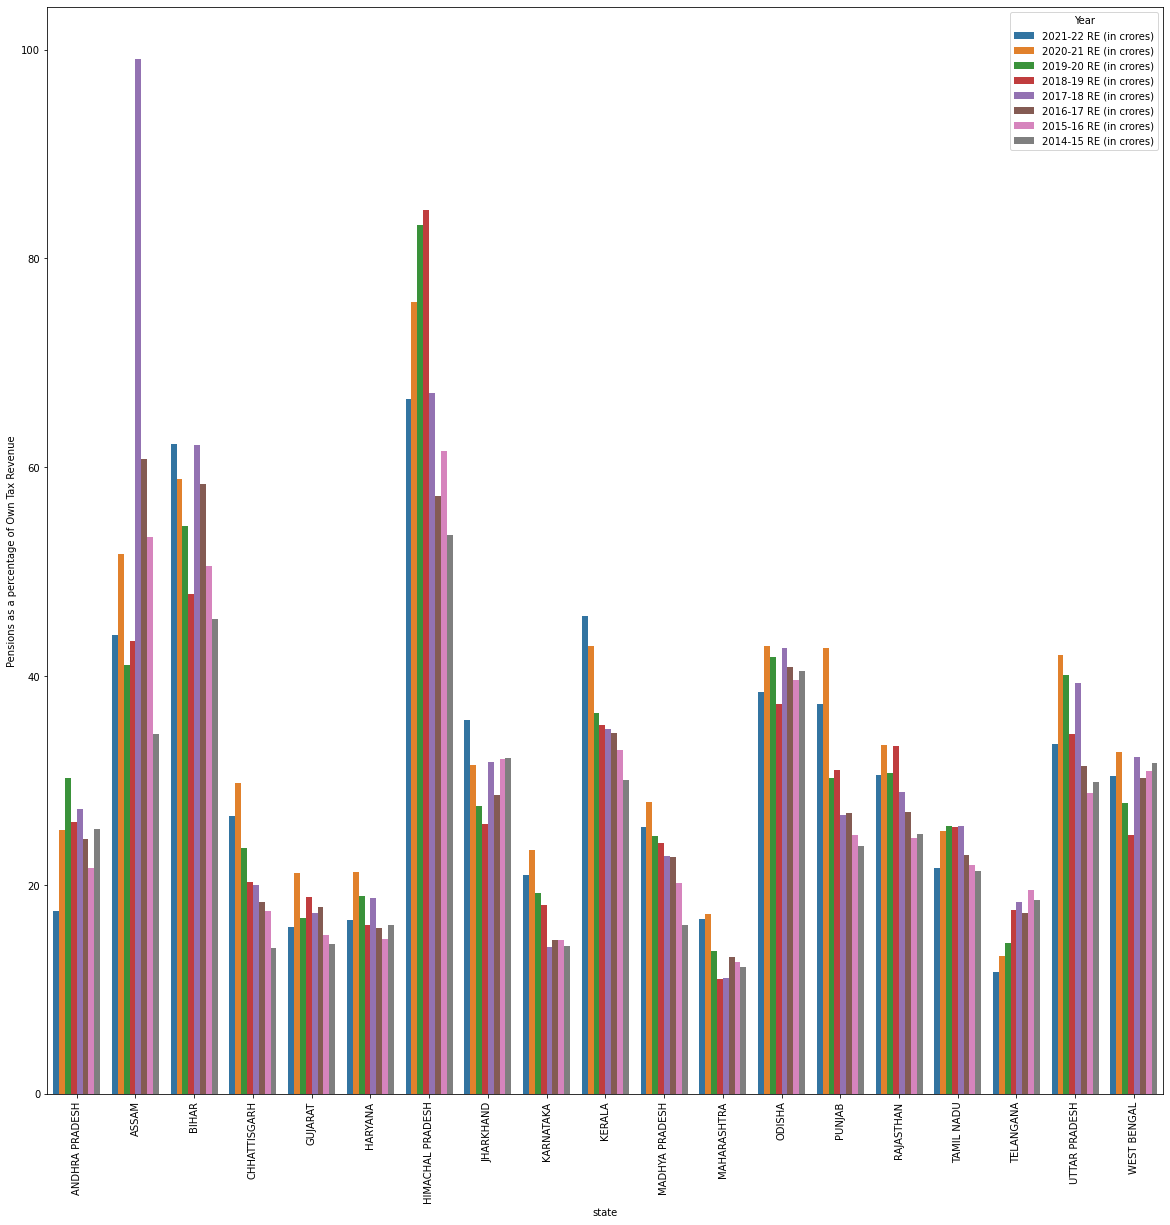

In [25]:
plt.figure(figsize = (20, 20))
sns.barplot(data = final_df, x = 'state', y = 'Pensions as a percentage of Own Tax Revenue', hue = 'Year')
plt.xticks(rotation = 90)
plt.show()

In [26]:
final_df.columns

Index(['Year', 'total revenue', 'Own Tax Revenue', 'Total expenditure',
       'Developmental Expenditure', 'Education, Sports, Arts and Culture',
       'Medical and Public Health', 'Family Welfare',
       'Non Developmental Expenditure', 'Interest payments', 'Salaries',
       'Pensions', 'state', 'Own Tax Revenue as a percentage of total revenue',
       'Pensions as a percentage of total revenue',
       'Pensions as a percentage of Own Tax Revenue'],
      dtype='object', name=0)

In [27]:
final_df['Interest payments plus Salaries plus Pensions'] = final_df['Interest payments'] + final_df['Salaries'] + final_df['Pensions']
final_df['Salaries plus Pensions'] = final_df['Salaries'] + final_df['Pensions']
final_df['Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare'] = final_df['Education, Sports, Arts and Culture'] + final_df['Medical and Public Health'] + final_df['Family Welfare']
